# Evaluación 1

---



**Autores:**

1. Juan Pablo Arriagada
2. Carlos Soto
3. Jose Toledo




**Correos Electrónicos:**


1. ju.arriagadar@duocuc.cl
2. car.sotoa@duocuc.cl
3. jo.toledoo@duocuc.cl

**Fecha de Creación:** Septiembre 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 1 de la asignatura electiva de Fundamentos de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

-
    pandas
    numpy
    matplotlib
    seaborn

-

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

# Puntajes y descuentos

1.	Fase 1 - Análisis de datos entregados para regresión
2.	Fase 1 - Análisis de datos entregados para clasificación
3.	Fase 1 - Análisis de otros datos no presentes
4.	Fase 1 - Definición de objetivos Fase 2
5.	Fase 1 - Definición de objetivos Fase 3
6.	Fase 1 - Definición de objetivos Fase 4
7.	Fase 1 - Definición de objetivos Fase 5
8.	Fase 2 - Análisis de tipos de datos
9.	Fase 2 - Existencia de nulos
10.	Fase 2 - Existencia de duplicados
11.	Fase 2 - Existencia de atípicos
12.	Fase 2 - Cálculo de estadísticos de variable continua
13.	Fase 2 - Interpretación de estadísticos de variable continua
14.	Fase 2 - Cálculo de estadísticos de variable discreta
15.	Fase 2 - Interpretación de estadísticos de variable discreta
16.	Fase 2 - Aplicación CORRECTA de prueba ANOVA
17.	Fase 2 - Análisis de distribución de una variable
18.	Fase 2 - Análisis correcto de correlación
19.	Fase 3 - Justificación y aplicación correcta de transformación de variable continua
20.	Fase 3 - Justificación y aplicación correcta de transformación de variable discreta
21.	Fase 3 - Análisis de distribución de variable continua ANTES y DESPUÉS de transformación

**DESCUENTOS SOBRE PUNTAJE FINAL**

1. Ausencia de buenas prácticas	10%
2. Ausencia de formato base de notebook	10%
3. Falta identificación de autores trabajo	10%
4. Faltas de ortografía y readacción 10%

#Prepara el notebook con este código

In [24]:
!wget https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv

--2025-09-29 21:31:19--  https://www.dropbox.com/s/sst1u94436vqca6/demo_round_traces.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds [following]
--2025-09-29 21:31:19--  https://www.dropbox.com/scl/fi/ujmigz0ky1r9ps75u8h1d/demo_round_traces.csv?rlkey=24f4k6ipomzkq1lj8kz2gayds
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc988f7a777c302708b55a1bd44d.dl.dropboxusercontent.com/cd/0/inline/CyTR8OJTLZZlD2p5XgPf20Pw3Qd4-dIwtkCYDb7JgRCsb9vhf-dKVHJbrVCS8Y5U3FMiPL0Cv_yru0pnIo8qRLjClM-FYgM6o3VK5hcHtvCqebrQoSTCm-2ljqnDNPfmCGI4eue89W4_flcMgvtAuJIW/file# [following]
--2025-09-29 21:31:19--  https://uc988f7a777c302708b55a1bd44d.dl.dropboxus

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# **Fase 1 - Comprensión del negocio**

In [26]:
df = pd.read_csv('demo_round_traces.csv', sep=";", low_memory = False)
df.head(231)

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist
0,600,de_inferno,Terrorist,1,4,1,76561198036987787,False,True,False,...,0,0,0,750,4400,0,0,0,0,5.013792e+05
1,601,de_inferno,Terrorist,1,4,1,76561197971812216,False,True,False,...,0,0,0,800,4400,0,0,0,0,2.088076e+05
2,602,de_inferno,Terrorist,1,4,1,76561197972240652,False,True,False,...,0,0,0,1000,4400,0,0,0,0,3.816520e+05
3,603,de_inferno,Terrorist,1,4,1,76561197975824962,False,True,False,...,0,0,0,850,4400,0,0,0,0,2.897545e+05
4,604,de_inferno,Terrorist,1,4,1,76561197960331095,False,True,True,...,0,0,0,1000,4400,0,0,0,0,2.545277e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,826,de_inferno,Terrorist,2,4,23,76561198019196091,False,False,False,...,0,0,0,4700,23500,24,4,5,11,3.351338e+05
227,827,de_inferno,Terrorist,2,4,23,76561197965932989,False,False,True,...,0,2,0,4700,23500,12,0,3,6,3.127064e+05
228,828,de_inferno,Terrorist,2,4,23,76561198001822267,False,False,True,...,0,0,0,4700,23500,21,2,2,7,3.655482e+05
229,829,de_inferno,Terrorist,2,4,23,76561198006466707,False,False,False,...,1,0,0,4700,23500,16,2,3,11,3.075550e+05


## Análisis de datos entregados

## **Contexto del Data Frame**
### **¿Qué es Counter-Strike: GO?**
Se trata de un videojuego multijugador en el que dos equipos de 5 jugadores se enfrentan entre sí. Los equipos se conocen como:

terroristas y contra-terroristas. El juego se desarrolla en rondas y el objetivo principal de cada equipo es diferente:

- **Terroristas**: Deben plantar una bomba con un temporizador de 45 segundos en uno de los dos sitios designados en el mapa.

- **Contra-terroristas**: Su misión es evitar que la bomba sea plantada o, si ya lo fue, desactivarla antes de que detone.

### ¿De dónde provienen los datos?
Los datos provienen de más de 7,000 partidas del juego. La información se extrajo de "replays", que son archivos que contienen el registro de cada acción realizada por los jugadores durante una partida. Estos datos se han compilado en un archivo CSV con 79,157 filas, donde cada fila corresponde a un jugador en una partida específica. El archivo tiene 29 columnas que describen distintas acciones de los jugadores dentro del juego.


##1. Fase 1 - Definicion de datos entregados para la variable de regresión

La variable de regresión seleccionada es "**MatchKills**", ya que al ser numérica y tener una gran importancia dentro del juego la hace la mejor opción.

In [27]:
y_regresion = df['MatchKills']

##2. Fase 1 -Definicion de datos entregados para la variable de clasificación


La variable seleccionada para la variable de clasificación es "**MatchWinner**", esta contiene 2 alternativas, el jugador gana o pierde una partida, esta debería depender de varias variables predictorias.


In [28]:
y_clasificacion = df ['MatchWinner']

##3. Fase 1 - Definicion de otros datos no presentes


Una posible variable faltante es la edad del jugador, ya que los jugadores mayores de 20 años tienden a tomar decisiones más tranquilas y pensadas, mientras que los más jóvenes suelen ser más frenéticos y tomar decisiones menos acertadas.

## 4. Fase 1 - Definición de objetivos fase 2 (Data Understanding)

Realizar un análisis exploratorio de datos en la Fase 2, identificando el tipo de variables, la existencia de valores nulos, duplicados y atípicos, así como calcular e interpretar los estadísticos descriptivos de variables continuas y discretas. Además, aplicar de manera correcta pruebas estadísticas como ANOVA y análisis de correlación, junto con el estudio de distribuciones, con el fin de garantizar la calidad de los datos y obtener una comprensión sólida para la toma de decisiones posteriores.

## 5. Fase 1 - Definición de objetivos fase 3 (Data Preparation)

Justificar y aplicar correctamente transformaciones a variables continuas y discretas, analizando sus distribuciones antes y después del proceso, con el propósito de mejorar la normalidad, y la preparación de los datos para posteriores análisis estadísticos.

## 6. Fase 1 - Definición de objetivos fase 4 (Modeling)

Modelar el DataFrame mediante la selección, preparación y estructuración adecuada de las variables, con el fin de generar un conjunto de datos limpio, coherente y optimizado que permita el desarrollo de modelos estadísticos y/o de machine learning confiables.

En caso de que la preparación de la data realizada en la Fase 3 no sea correcta o suficiente, se deberá retroceder y ajustar las transformaciones aplicadas para garantizar la calidad y pertinencia de los datos antes de continuar con el modelado.

##7. Fase 1 - Definición de objetivos fase 5 (Evaluation)

Evaluar el desempeño del modelo desarrollado mediante la aplicación de métricas e indicadores adecuados, con el propósito de validar su precisión, confiabilidad y capacidad de generalización.

En caso de que los resultados no sean consistentes con los objetivos esperados, se deberá retomar la Fase 1 – Entendimiento del negocio, con el fin de redefinir los requerimientos, ajustar supuestos y garantizar que el modelo responda de manera efectiva a las necesidades planteadas.

## **Fase 2 - Comprensión de los datos**


## 8. Fase 2 - Análisis de tipos de datos

In [29]:
df.info(verbose=True, show_counts=True, memory_usage=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79157 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   SteamId                      79157 non-null  int64  
 7   RoundWinner                  79157 non-null  bool   
 8   MatchWinner                  79157 non-null  bool   
 9   Survived                     79157 non-null  bool   
 10  AbnormalMatch                79157 non-null  bool   
 11  TimeAlive                    79157 non-null  float64
 12  ScaledTimeAlive              79157 non-null  float64
 13  AvgCentroidDista

A primera vista se ve que todas las filas tienen datos, es decir, que no hay nulos. Además, se puede ver el tipo de dato de las columnas que son int, float, bool y object.

Hay 79.157 filas de datos y 37 columnas.

##9. Fase 2 - Existencia de nulos

In [30]:
# Calcular nulos por columna
columnas_con_nulos = df.isna().sum()

# Porcentaje de nulos
porcentaje_nulos = (columnas_con_nulos / df.shape[0]) * 100

# Construir DataFrame con todas las columnas
resultado = pd.DataFrame({
    "Cantidad Nulos": columnas_con_nulos,
    "Porcentaje Nulos (%)": porcentaje_nulos
}).round(2)

# Si no hay nulos en ninguna columna, se crea una condición para que muestre 0
if resultado["Cantidad Nulos"].sum() == 0:
    resultado.loc[:, "Cantidad Nulos"] = 0
    resultado.loc[:, "Porcentaje Nulos (%)"] = 0.0

resultado


,Cantidad Nulos,Porcentaje Nulos (%)
Unnamed: 0,0,0.0
Map,0,0.0
Team,0,0.0
InternalTeamId,0,0.0
MatchId,0,0.0
RoundId,0,0.0
SteamId,0,0.0
RoundWinner,0,0.0
MatchWinner,0,0.0
Survived,0,0.0


La ausencia de valores nulos en el DataFrame significan buenas noticias, ya que garantiza la integridad y completitud de los datos, evitando la necesidad de imputaciones o eliminaciones que podrían sesgar los resultados. Esto permite realizar análisis estadísticos y un posterior modelado con mayor precisión y confianza, asegurando conclusiones más precisas.

## 10. Fase 2 - Existencia de duplicados


Nuestra intención para la busqueda de duplicados es analizar la data y ver la calidad de estos presentes, una vez teniendo información sobre la existencia de duplicados se podrá tomar una desición en cuanto a sobre que hacer al respecto.

In [31]:

# Recorremos todas las columnas del DataFrame
for columna in df.columns:
    # Imprimimos el nombre de la columna y la cantidad de filas duplicadas en esa columna

    # {columna:<27} → Formatea el nombre de la columna:
    # - < : alineación a la izquierda
    # - 27: ancho mínimo de 27 caracteres (rellena con espacios si el nombre es más corto)

    # df[columna].duplicated().sum():
    # - df[columna].duplicated() genera una serie booleana donde True = valor repetido (después de su primera aparición)
    # - .sum() cuenta los True, es decir, la cantidad de duplicados en esa columna

    print(f"{columna:<27} ----> {df[columna].duplicated().sum()}")

Unnamed: 0                  ----> 0
Map                         ----> 79153
Team                        ----> 79155
InternalTeamId              ----> 79155
MatchId                     ----> 78824
RoundId                     ----> 79121
SteamId                     ----> 78795
RoundWinner                 ----> 79155
MatchWinner                 ----> 79155
Survived                    ----> 79155
AbnormalMatch               ----> 79156
TimeAlive                   ----> 27529
ScaledTimeAlive             ----> 35125
AvgCentroidDistance         ----> 14175
TravelledDistance           ----> 1156
AvgRoundVelocity            ----> 1141
AvgKillDistance             ----> 43568
AvgSiteDistance             ----> 937
RLethalGrenadesThrown       ----> 79152
RNonLethalGrenadesThrown    ----> 79150
PrimaryAssaultRifle         ----> 74833
PrimarySniperRifle          ----> 75108
PrimaryHeavy                ----> 78970
PrimarySMG                  ----> 78997
PrimaryPistol               ----> 79155
FirstKil

In [32]:
# Filtra las filas duplicadas en todo el DataFrame
duplicados = df[df.duplicated(keep=False)]

# Muestra el resultado
duplicados

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,SteamId,RoundWinner,MatchWinner,Survived,...,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,AvgMatchKillDist


Se realizó una búsqueda de filas duplicadas en el conjunto de datos y se confirmó que no existen, lo que indica una buena calidad inicial en la recolección de los datos.

## 11. Fase 2 - Existencia de atípicos


In [33]:

def buscar_atipicos(data : pd.DataFrame, columna : str) -> pd.DataFrame:
  """
  Busca valores atípicos en una columna.
  """
  # Calcular los límites
  Q1 = data[columna].quantile(0.25)
  Q3 = data[columna].quantile(0.75)
  # Calcula rango intercuartilico
  IQR = Q3 - Q1
  limite_inferior = Q1 - 1.5 * IQR
  limite_superior = Q3 + 1.5 * IQR

  # Filtrar outliers
  return data[(data[columna] < limite_inferior) | (data[columna] > limite_superior)]

def obtener_cantidad_atipicos(data : pd.DataFrame, columnas : np.array) -> dict:
  """
  Obtiene la cantidad de atípicos por cada columna.
  """
  total_atipicos = {}
  for columna in data[columnas]:
    atipicos = buscar_atipicos(data, columna)
    total_atipicos[columna] = atipicos.shape[0]
  return total_atipicos
atipicos_por_columna = obtener_cantidad_atipicos(df, df.describe().columns)
atipicos_por_columna





{'Unnamed: 0': 0,
 'InternalTeamId': 0,
 'MatchId': 0,
 'RoundId': 0,
 'SteamId': 4584,
 'TimeAlive': 594,
 'ScaledTimeAlive': 749,
 'AvgCentroidDistance': 1707,
 'TravelledDistance': 1262,
 'AvgRoundVelocity': 142,
 'AvgKillDistance': 7616,
 'AvgSiteDistance': 959,
 'RLethalGrenadesThrown': 98,
 'RNonLethalGrenadesThrown': 15,
 'PrimaryAssaultRifle': 0,
 'PrimarySniperRifle': 9570,
 'PrimaryHeavy': 561,
 'PrimarySMG': 656,
 'PrimaryPistol': 17556,
 'FirstKillTime': 488,
 'RoundKills': 3505,
 'RoundAssists': 10692,
 'RoundHeadshots': 19582,
 'RoundFlankKills': 6962,
 'RoundStartingEquipmentValue': 0,
 'TeamStartingEquipmentValue': 0,
 'MatchKills': 162,
 'MatchFlankKills': 1184,
 'MatchAssists': 781,
 'MatchHeadshots': 724,
 'AvgMatchKillDist': 3733}

Dentro de todas las columnas con valores átipicos se eligió la de MatchKills para el analisis de gráfico de caja.

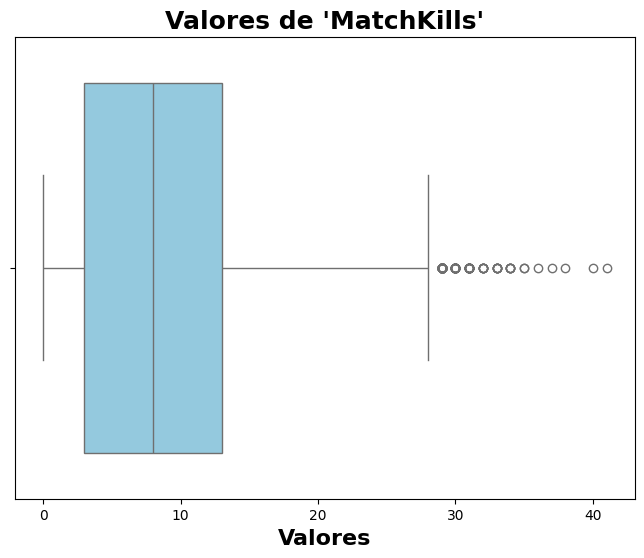

,MatchKills
count,79157.00
mean,8.51
std,6.20
min,0.00
25%,3.00
50%,8.00
75%,13.00
max,41.00


In [34]:
# Gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['MatchKills'], color='skyblue')
plt.title("Valores de 'MatchKills'", fontsize=18, fontweight="bold")
plt.xlabel('Valores', fontsize=16, fontweight="bold")
plt.show()
df['MatchKills'].describe().round(2)



La variable MatchKills presenta una media de 8.51 y una mediana de 8, lo que indica cierta simetría en la distribución. Sin embargo, el valor máximo (41) se aleja notablemente del rango de los cuartiles (3–13), revelando la presencia de atípicos que representan desempeños excepcionales en las partidas. Estos casos extremos pueden influir en los modelos, por lo que conviene analizarlos antes de aplicar técnicas estadísticas o de predicción.

## 12. Fase 2 - Cálculo de estadísticos de variable continua


Se analizará la variable TimeAlive.

In [35]:
df['TimeAlive'].describe()

,TimeAlive
count,79157.000000
mean,72.795720
std,48.321035
min,0.000000
25%,47.080072
50%,69.239615
75%,92.647813
max,2990.560394


## 13. Fase 2 - Interpretación de estadísticos de variable continua


La distribución de TimeAlive muestra que la mediana (69.23 s) está muy cercana a la media, lo que indica una distribución relativamente simétrica a pesar de la variabilidad. Los valores del percentil 25 (47.08 s) y percentil 75 (92.64 s) evidencian que el 50% de los jugadores sobrevive entre 47 y 93 segundos, lo que puede considerarse el rango “normal” de desempeño. Sin embargo, el valor máximo (2990.56 s) es extremadamente alto respecto al resto de los datos, lo que probablemente corresponde a outliers o situaciones atípicas dentro del juego (por ejemplo, partidas anormales o errores de registro), y que sería importante revisar antes de cualquier modelado.

## 14. Fase 2 - Cálculo de estadísticos de variable discreta


Se analizará la variable discreta.

Conteo de partidas por mapa:
Map
de_inferno    28869
de_dust2      19120
de_mirage     19019
de_nuke       12149
Name: count, dtype: int64


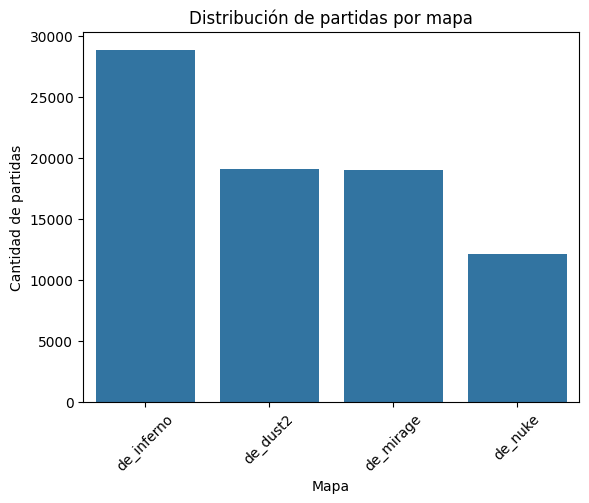

In [36]:
map_counts = df["Map"].value_counts()

print("Conteo de partidas por mapa:")
print(map_counts)

sns.barplot(x=map_counts.index, y=map_counts.values)
plt.title("Distribución de partidas por mapa")
plt.xlabel("Mapa")
plt.ylabel("Cantidad de partidas")
plt.xticks(rotation=45)
plt.show()

## 15. Fase 2 - Interpretación de estadísticos de variable discreta


Se observa que el mapa Inferno es el más jugado, con un total de 28.869 partidas totales, seguido de Dust2 y Mirage con un total de19.120 y 19019 partidas respectivamente. En cambio, mapas como Nuke aparecen con menor frecuencia con un total de12.149 Partidas.

Esto refleja que el dataset no tiene una distribución equilibrada entre mapas, lo que podría influir en los modelos predictivos si ciertas variables dependen fuertemente del tipo de mapa.

## 16. Fase 2 - Aplicación CORRECTA de prueba ANOVA






### Se aplicará una prueba ANOVA para responder la siguiente pregunta ¿El valor del equipamiento al inicio de una ronda (RoundStartingEquipmentValue) tiene un efecto significativo en quién gana esa misma ronda (RoundWinner)?

### Definición de hipótesis
**Hipótesis Nula (H₀)**: El valor promedio del equipamiento al inicio de la ronda (RoundStartingEquipmentValue) es el mismo para los equipos que ganan la ronda (RoundWinner = True) y los que la pierden (RoundWinner = False). No hay una diferencia significativa.

**Hipótesis Alternativa (H₁)**: El valor promedio del equipamiento al inicio de la ronda es diferente entre los equipos que ganan y pierden la ronda.


In [37]:
# 1. Separamos los datos en dos grupos basados en el resultado de la RONDA
# Grupo 1: El valor del equipamiento de los jugadores que GANARON la ronda
grupo_ganadores_ronda = df[df['RoundWinner'] == True]['RoundStartingEquipmentValue']

# Grupo 2: El valor del equipamiento de los jugadores que PERDIERON la ronda
grupo_perdedores_ronda = df[df['RoundWinner'] == False]['RoundStartingEquipmentValue']

# 2. Aplicamos la prueba ANOVA de una vía
f_statistic, p_value = stats.f_oneway(grupo_ganadores_ronda, grupo_perdedores_ronda)

print(f"Estadístico F: {f_statistic}")
print(f"P-value: {p_value}")

# 3. Interpretamos el resultado basado en el p-value
alpha = 0.05
if p_value < alpha:
    print("\nConclusión: Se rechaza la hipótesis nula.")
    print("Existe una diferencia estadísticamente significativa en el valor del equipamiento entre los equipos que ganan y los que pierden la ronda.")
else:
    print("\nConclusión: No se puede rechazar la hipótesis nula.")

Estadístico F: 7976.974478746839
P-value: 0.0

Conclusión: Se rechaza la hipótesis nula.
Existe una diferencia estadísticamente significativa en el valor del equipamiento entre los equipos que ganan y los que pierden la ronda.


### Conclusión

El p-value obtenido es 0.0. Esto nos permite rechazar la hipótesis por completo.

La conclusión es clara: el valor del equipamiento con el que un equipo empieza una ronda tiene un impacto directo y estadísticamente significativo en la probabilidad de ganar esa misma ronda. Los equipos que invierten más en su equipamiento al inicio de una ronda tienen, en promedio, más posibilidades de ganarla.

## 17. Fase 2 - Análisis de distribución de una variable


Moda 4 - Mediana 0.0 - Media 0.7


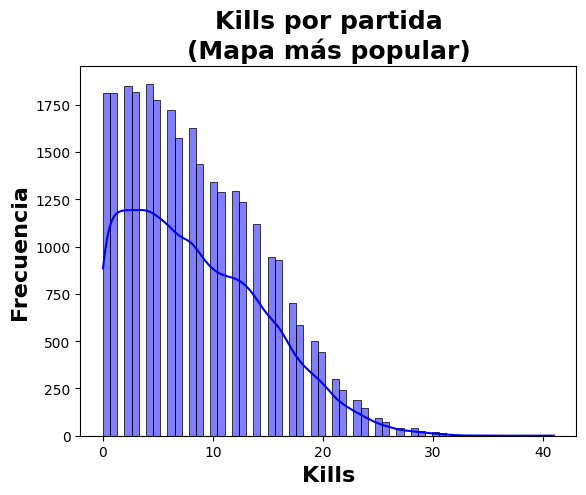

In [38]:
top_maps = df['Map'].value_counts().head(5)
pop_map = [top_maps.index[0]]
selected_maps = df[df['Map'].isin(pop_map)]

moda = selected_maps.groupby('MatchKills')['MatchKills'].count().sort_values(ascending=False).index[0]
mediana = np.quantile(selected_maps.RoundKills, 0.5)
media = np.mean(selected_maps.RoundKills)
print("Moda {0} - Mediana {1} - Media {2:.1f}".format(moda, mediana, media))

sns.histplot(selected_maps.MatchKills, color='blue', edgecolor='black', kde=True)
plt.title('Kills por partida\n(Mapa más popular)', fontsize=18, fontweight="bold")
plt.xlabel('Kills', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")
plt.show()



El histograma muestra que la mayoría de los jugadores obtiene entre 0 y 10 kills por partida, concentrándose en valores bajos. La distribución es asimétrica a la derecha, con una cola larga que refleja la presencia de jugadores excepcionales que logran más de 20 kills. En general, el gráfico evidencia un desempeño desigual, donde pocos concentran los resultados más altos.

## 18. Fase 2 - Análisis correcto de correlación


In [39]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 31 columnas numéricas y 6 columnas categóricas en los datos de entrenamiento


In [40]:
del numeric_data['InternalTeamId']
del numeric_data['MatchId']
del numeric_data['RoundId']
del numeric_data['SteamId']
del numeric_data['Unnamed: 0']

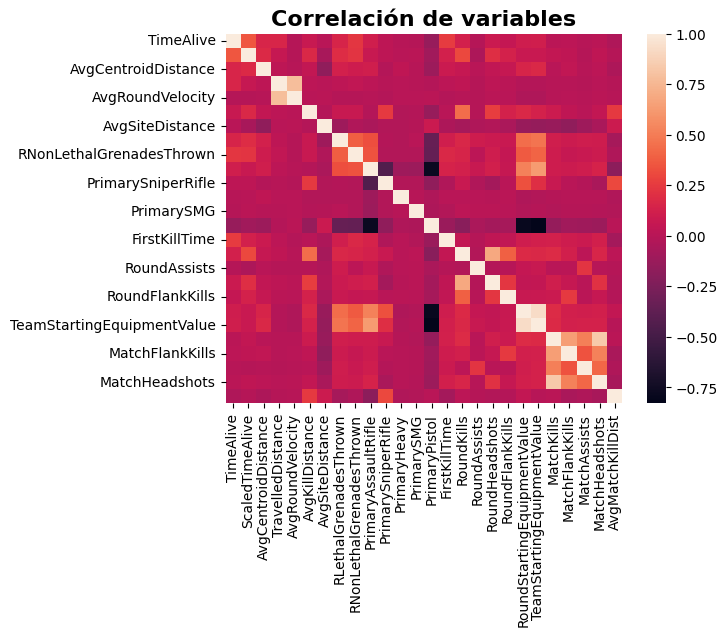

In [41]:
corr = numeric_data.corr()
sns.heatmap(corr)
plt.title("Correlación de variables", fontsize=16, fontweight="bold")
plt.show()

El mapa de calor de correlación muestra fuertes relaciones positivas entre las variables de actividad y distancia, como TimeAlive, TravelledDistance y AvgKillDistance. Esto indica que los jugadores que sobreviven más tiempo y se mueven más también tienden a interactuar en tiroteos a distancias más largas. Existe una clara disociación (correlación negativa) en el uso de armamento: el PrimarySniperRifle se correlaciona negativamente con el PrimarySMG y el PrimaryPistol, lo que evidencia estilos de juego opuestos (largo alcance vs. corto alcance/agresión). En general, el gráfico evidencia que las métricas de buen rendimiento individual (por ejemplo, RoundFlankKills o RoundAssists) se traducen consistentemente en buenos resultados generales de partido (MatchFlankKills, MatchAssists), reforzando que las habilidades a nivel de ronda son predictivas del desempeño total.

# **Fase 3 - Preparación de los datos**

##19. Fase 3 - Justificación y aplicación correcta de transformación de variable continua

### Justificación de la Elección y Transformación

La variable MatchKills presenta una distribución con un sesgo a la derecha, lo que significa que la mayoría de los jugadores tienen un número moderado de kills, pero existen unos pocos jugadores con un rendimiento excepcionalmente alto que "estiran" la distribución. Este tipo de sesgo puede hacer que los modelos de Machine Learning le den un peso desproporcionado a estos valores atípicos.

Para mitigar este efecto, aplicaremos una transformación logarítmica. Esta técnica es muy efectiva para reducir el sesgo positivo, ya que "comprime" los valores más altos y "expande" los más bajos, resultando en una distribución más simétrica y parecida a la normal.

Análisis de 'MatchKills' (SOLO EN EL MAPA MÁS POPULAR) ANTES y DESPUÉS


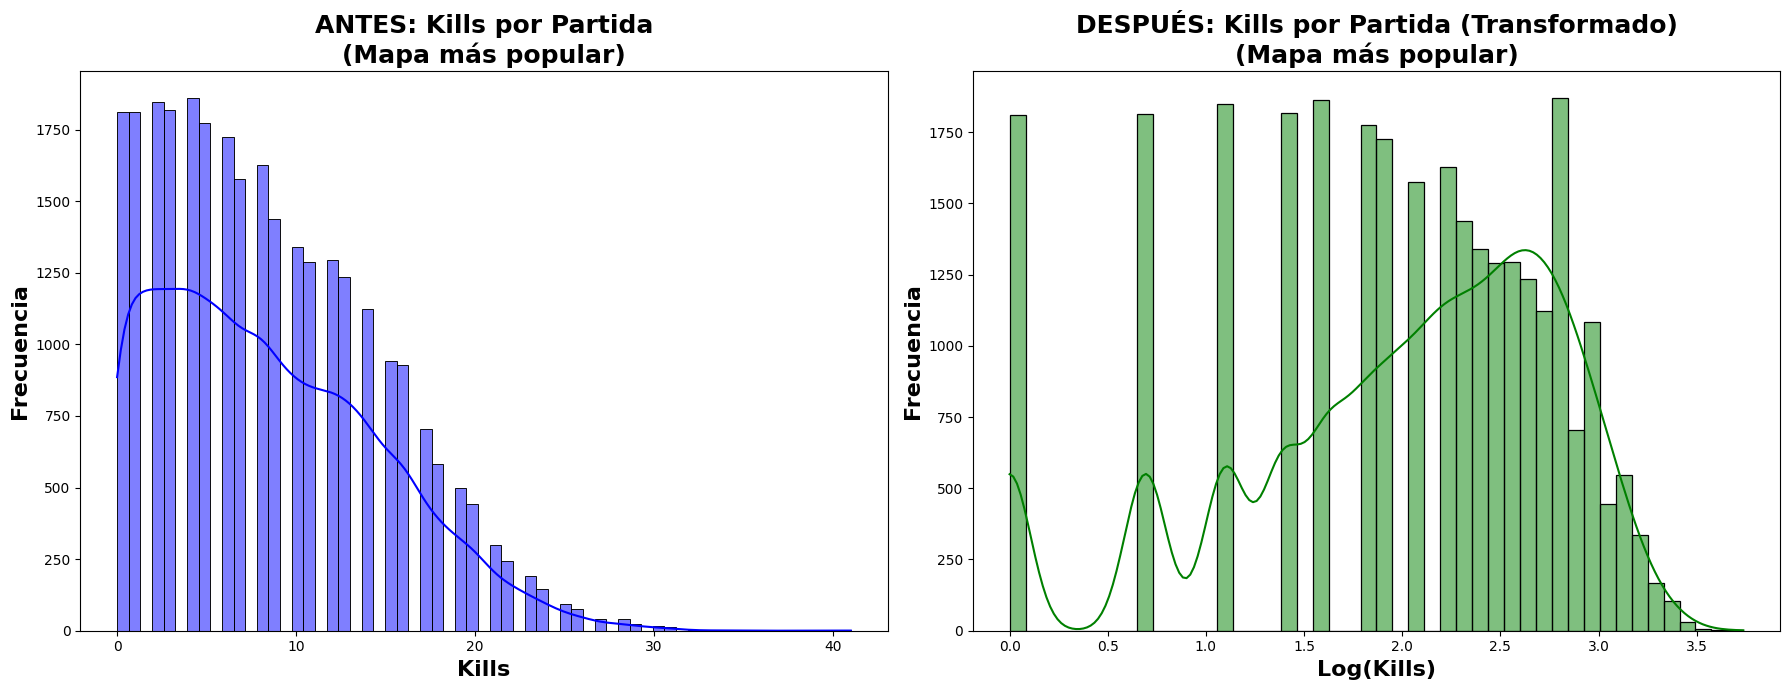

In [47]:
# Creamos la nueva columna en el dataframe 'selected_maps'
selected_maps.loc[:, 'MatchKills_log'] = np.log1p(selected_maps['MatchKills'])

# --- Visualización Comparativa ---
print("Análisis de 'MatchKills' (SOLO EN EL MAPA MÁS POPULAR) ANTES y DESPUÉS")

# Configuramos la figura para mostrar dos gráficos
plt.figure(figsize=(18, 7)) # Hacemos la figura más ancha para que quepan bien

# Gráfico 1: ANTES (Réplica exacta de tu gráfico de Fase 2)
plt.subplot(1, 2, 1)
sns.histplot(selected_maps['MatchKills'], color='blue', edgecolor='black', kde=True)
plt.title('ANTES: Kills por Partida\n(Mapa más popular)', fontsize=18, fontweight="bold")
plt.xlabel('Kills', fontsize=16, fontweight="bold")
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")

# Gráfico 2: DESPUÉS (Mismo estilo, pero con los datos transformados)
plt.subplot(1, 2, 2)
sns.histplot(selected_maps['MatchKills_log'], color='green', edgecolor='black', kde=True)
plt.title('DESPUÉS: Kills por Partida (Transformado)\n(Mapa más popular)', fontsize=18, fontweight="bold")
plt.xlabel('Log(Kills)', fontsize=16, fontweight="bold") # Cambiamos el label del eje X
plt.ylabel('Frecuencia', fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

##20. Fase 3 - Justificación y aplicación correcta de transformación de variable discreta

### Justificación de la Elección y Transformación
Para la transformación de una variable discreta, se ha seleccionado la variable Map. Esta variable es de tipo categórica nominal, lo que significa que sus valores (los nombres de los mapas) no tienen un orden o jerarquía intrínseca; por ejemplo, "de_inferno" no es inherentemente "mayor" o "menor" que "de_dust2".

Los modelos de Machine Learning no pueden procesar datos de texto directamente. Un enfoque incorrecto sería asignar un número entero a cada mapa (ej. de_dust2 = 1, de_nuke = 2), ya que esto introduciría una falsa relación de orden que el modelo interpretaría erróneamente (pensaría que "nuke" es el doble que "dust2").

La técnica correcta para manejar este tipo de variables es el One-Hot Encoding. Este método convierte la columna categórica original en múltiples columnas nuevas, una para cada categoría única (en este caso, cada mapa). Cada una de estas nuevas columnas es binaria (contiene solo 0 o 1), indicando con un '1' la presencia de esa categoría para una fila dada. De esta manera, representamos la información categórica en un formato numérico que el modelo puede utilizar sin hacer suposiciones incorrectas.

In [43]:
print(f"La variable 'Map' en el dataframe original tiene {df['Map'].nunique()} valores únicos (mapas distintos).")
print(f"Estos son: {df['Map'].unique()}")

# Aplicamos One-Hot Encoding con la función get_dummies de pandas.
# El parámetro 'prefix' nos ayuda a que los nombres de las nuevas columnas sean claros.
df_transformado = pd.get_dummies(df, columns=['Map'], prefix='Mapa')

# Mostramos cómo se ven las nuevas columnas en el dataframe transformado.
# Seleccionamos algunas columnas para ver el cambio de forma clara.
columnas_a_mostrar = ['Team', 'MatchWinner'] + [col for col in df_transformado.columns if 'Mapa_' in col]

print("\n--- Vista del DataFrame Completo después de One-Hot Encoding ---")
print(df_transformado[columnas_a_mostrar].head(250))

La variable 'Map' en el dataframe original tiene 4 valores únicos (mapas distintos).
Estos son: ['de_inferno' 'de_nuke' 'de_mirage' 'de_dust2']

--- Vista del DataFrame Completo después de One-Hot Encoding ---
                 Team  MatchWinner  Mapa_de_dust2  Mapa_de_inferno  \
0           Terrorist         True          False             True   
1           Terrorist         True          False             True   
2           Terrorist         True          False             True   
3           Terrorist         True          False             True   
4           Terrorist         True          False             True   
..                ...          ...            ...              ...   
245  CounterTerrorist        False          False            False   
246  CounterTerrorist        False          False            False   
247  CounterTerrorist        False          False            False   
248  CounterTerrorist        False          False            False   
249  CounterTerroris

###Interpretación del Resultado
Como se puede observar en la tabla de salida, la columna original Map ha sido reemplazada por nuevas columnas binarias, una por cada mapa único en el dataset (ej. Mapa_de_dust2, Mapa_de_inferno, etc.). Cada fila ahora tiene un valor de 1(True) en la columna correspondiente al mapa en el que se jugó la partida y un 0(Flase) en el resto. Esta transformación ha convertido exitosamente la información de texto en un formato numérico adecuado para el modelado, preservando su naturaleza categórica sin introducir sesgos.

##21. Fase 3 - Análisis de distribución de variable continua ANTES y DESPUÉS de transformación

### Análisis de la Transformación de"MatchKills"
La comparación visual entre los dos gráficos es contundente y demuestra el éxito de la transformación logarítmica.

**Gráfico "ANTES" (Izquierda)**: Muestra la distribución original con un fuerte sesgo a la derecha. Se observa una alta concentración de jugadores en el rango bajo de kills, con una larga "cola" que se extiende para representar a los pocos jugadores con un número de eliminaciones muy alto.

**Gráfico "DESPUÉS" (Derecha)**: Muestra la distribución de la nueva variable MatchKills_log. Como se observa correctamente, el nuevo pico de frecuencia se sitúa entre los valores 2 y 3 del eje X. Esto indica que el rango de kills más común en el dataset original corresponde a valores cuyo logaritmo natural está en ese intervalo (aproximadamente entre 7 y 20 kills).

**Conclusión**: El principal logro de esta transformación no es la ubicación del pico, sino el cambio en la forma de la distribución. La nueva distribución es significativamente más simétrica que la original. Se ha corregido el sesgo y se ha reducido drásticamente el efecto de los valores atípicos, creando una variable mucho más balanceada y adecuada para ser utilizada por algoritmos de Machine Learning, que a menudo son sensibles a las distribuciones asimétricas.